In [72]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
# csv_file pathing
fertility_rate_path = "Resource/fred_fertility_rates.csv"
living_arrangements_path = "Resource/census_living_arrangements.csv"
marital_status_path = "Resource/marital status overtime.csv"
age_fertility_path = "Resource/Age_Fertility.csv"
education_path = "Resource/Female Education Attainment Level.csv"


In [74]:
# Raw DataFrame Prep: Fertility Rates

fertility_rate_df = pd.read_csv(fertility_rate_path).dropna()
fertility_rate_df['DATE'] = pd.to_datetime(fertility_rate_df['DATE'].str.strip(), format='%d/%m/%Y').dt.year
fertility_rate_df.rename(columns = {'SPDYNTFRTINUSA':'fertility_rate','DATE':'Year'}, inplace = True) 

print(f'{len(fertility_rate_df)} records')
fertility_rate_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# fertility_rate_df.to_csv("Output/fertility_rate.csv", index=False, header=True)


59 records


,Year,fertility_rate
0,1960,3.654
1,1961,3.620
2,1962,3.461
3,1963,3.319
4,1964,3.190


In [75]:
# Raw DataFrame Prep: Living Arrangements

# Read csv, drop na
living_arrangements_df = pd.read_csv(living_arrangements_path).dropna()

# Merge with fertility rates
merge_living_df = pd.merge(fertility_rate_df, living_arrangements_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_living_df)} records')
merge_living_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_living_df.to_csv("Output/living_arrangements.csv", index=False, header=True)

60 records


,Year,fertility_rate,under_18,two_parents,mother_only,father_only,other_relatives,non_relatives
0,1960,3.654,63727.0,55877.0,5105.0,724.0,1601.0,420.0
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Raw DataFrame Prep: Marital Status

# Read csv, drop na
marital_status_df = pd.read_csv(marital_status_path).dropna()

# Merge with fertility rates
merge_marital_df = pd.merge(fertility_rate_df, marital_status_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_marital_df)} records')
merge_marital_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_marital_df.to_csv("Output/marital_status.csv", index=False, header=True)

61 records


,Year,fertility_rate,Men Total,Married Men,Unmarried Men Total,Never Married Men,Widowed Men,Divorced Men,Women Total,Married Women,Unmarried Women Total,Never Married Women,Widowed Women,Divorced Women
0,1960,3.654,"60,273","41,781","18,492","15,274","2,112","1,106","64,607","42,583","22,024","12,252","8,064","1,708"
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Raw DataFrame Prep: Fertility by Age

# Read csv
age_fertility_df = pd.read_csv(age_fertility_path)

# Clean
age_fertility_df = age_fertility_df[['Year', 'Age 10-14 Years', 'Age 15-19 Years', 'Age 20-24 Years',
                           'Age 25-29 Years', 'Age 30-34 Years', 'Age 35-39 Years', 'Age 40-44 Years', 'Age 45-49 Years']]

# Merge with fertility rates
merge_age_df = pd.merge(fertility_rate_df, age_fertility_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_age_df)} records')
merge_age_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_age_df.to_csv("Output/fertility_age.csv", index=False, header=True)

73 records


,Year,fertility_rate,Age 10-14 Years,Age 15-19 Years,Age 20-24 Years,Age 25-29 Years,Age 30-34 Years,Age 35-39 Years,Age 40-44 Years,Age 45-49 Years
0,1960,3.654,0.8,89.1,258.1,197.4,112.7,56.2,15.5,0.9
1,1961,3.620,0.9,88.6,251.9,197.5,113.2,55.6,15.6,0.9
2,1962,3.461,0.8,81.4,241.9,191.1,108.6,52.6,14.9,0.9
3,1963,3.319,0.9,76.7,229.1,185.1,105.8,51.2,14.2,0.9
4,1964,3.190,0.9,73.1,217.5,178.7,103.4,49.9,13.8,0.8


In [81]:
# Raw DataFrame Prep: Female Education Attainment Level

# Read csv and drop na
education_df = pd.read_csv(education_path).dropna()

education_df

,Year,Total # in thousands,Elementary 0-4,Middle School 5-8,High School 1-3,High School 4,College 1-3,College 4
0,1950,44857,4417,15824,7843,10114,3358,2264
1,1952,45990,3608,15398,8180,12314,3550,2638
2,1957,49422,3951,14682,8948,14602,3638,2813
3,1959,50437,3559,14451,9194,15349,4087,2969
4,1960,51468,3781,15656,10151,14267,4620,2991
...,...,...,...,...,...,...,...,...
57,2015,"110,245","1,358","3,626","7,408","31,578","30,253","36,021"
58,2016,"111,643","1,231","3,565","6,817","31,221","31,192","37,617"
59,2017,"112,597","1,117","3,288","6,799","31,216","31,185","38,991"
60,2018,"113,969","1,156","3,316","6,743","31,360","31,142","40,251"


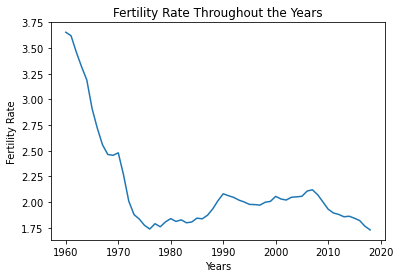

In [95]:
fertility_x = merge_age_df["Year"]
fertility_y = merge_age_df["fertility_rate"]

plt.xlabel("Years")
plt.ylabel("Fertility Rate")
plt.title("Fertility Rate Throughout the Years")
plt.plot(fertility_x, fertility_y)
plt.show()

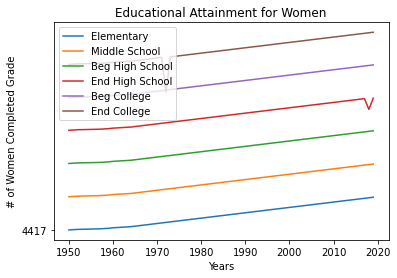

In [96]:
elementary_y = education_df["Elementary 0-4"]
elementary_x = education_df["Year"]

middle_school_y = education_df["Middle School 5-8"]
middle_school_x = education_df["Year"]

high_school_y = education_df["High School 1-3"]
high_school_x = education_df["Year"]

high_school_endy = education_df["High School 4"]
high_school_endx = education_df["Year"]

college_y = education_df["College 1-3"]
college_x = education_df["Year"]

college_endy = education_df["College 4"]
college_endx = education_df["Year"]

plt.plot(elementary_x, elementary_y, label="Elementary")
plt.plot(middle_school_x, middle_school_y, label="Middle School")
plt.plot(high_school_x, high_school_y, label="Beg High School")
plt.plot(high_school_endx, high_school_endy, label="End High School")
plt.plot(college_x, college_y, label="Beg College")
plt.plot(college_endx, college_endy, label="End College")
plt.yticks(np.arange(0, 5000, 10000))

plt.title("Educational Attainment for Women")
plt.xlabel("Years")
plt.ylabel("# of Women Completed Grade")
plt.legend(loc="upper left")
plt.show()


In [80]:
#Female educational attainment has increased in every grade across the US. It can be safe to assume that as female educational attainment increases, female fertility decreases.
#This can be linked to sexual education, woman in the workforce that do not have time to bear a child until much later in life.
